# **Waste Classification Dataset** 🟦🗑️ 🟩🗑️

## **Introduction** 🌍  
The **Waste Classification Dataset** is designed to enable the development of an **AI-powered Waste Classification System** aimed at promoting **sustainability** and **efficient waste management**. It consists of **high-quality labeled images** organized into hierarchical categories, supporting **multi-level classification tasks**.

Waste segregation is a **critical step** toward reducing environmental impact, improving **recycling efficiency**, and maintaining **public health** standards. This dataset empowers AI solutions to address these challenges, making it suitable for applications in **recycling plants**, **urban waste management**, and **smart city projects**.

---

## **Primary Goal 🎯**  
The **primary goal** of this dataset is to facilitate the development of an **AI-powered waste classification system** that can accurately **identify and categorize waste materials** into distinct classes. This classification aims to:

- **Enhance Waste Management Efficiency 🚀** – Enable **automated systems** to sort and process waste effectively, minimizing **manual effort** and **operational costs**.  
- **Promote Sustainability 🌱** – Support **eco-friendly practices** by improving **recycling processes** and **waste segregation** to reduce **environmental impact**.  
- **Ensure Scalability 🔄** – Provide a **flexible dataset** for building **multi-class and hierarchical models** that can later integrate with **IoT devices** and **real-time detection systems**.  
- **Improve Public Health Standards 🏥** – Prevent the mishandling of **hazardous waste** by enabling accurate detection, ensuring **safe disposal**, and maintaining **regulatory compliance**.  

This dataset serves as the **foundation** for building **innovative AI solutions** in **waste management**, contributing to a **cleaner, greener, and smarter future 🌏**.

---

### **Top-Level Categories 🌍**  

- **Hazardous 🚨** – Items like **battery** and **biological** that need **special handling**.  
  - **Sub-Categories:** Biological, Battery  

- **Non-Recyclable 🚯** – Includes **ceramic products**, **diapers**, **plastic bags**, and **sanitary napkins** that cannot be **recycled easily**.  
  - **Sub-Categories:** Shoes, Trash, Clothes  

- **Recyclable 🟦🗑️** – Consists of **paper**, **glass**, and **metals** that can be **reprocessed**.  
  - **Sub-Categories:** White Glass, Brown Glass, Metal, Green Glass, Plastic  

- **Organic 🟩🗑️** – Contains **biodegradable waste**, including **food scraps** and **plant materials**.  
  - **Sub-Categories:** Cardboard, Paper  

---

### **Data Size and Format 📊**  
- **Total Images:** Thousands of **labeled images** to ensure **visual diversity**.  
- **File Format:** JPEG/PNG files optimized for **image classification tasks**.  
- **Split Ratio:** Divided into **80% training** and **20% testing** for **model training and evaluation**.  

---

### **Why This Dataset? 🌱**  
- **Real-World Relevance 🛠️** – Focuses on solving **environmental challenges** through **AI-driven sustainability solutions**.  
- **Scalability 🚀** – Suitable for **multi-class and multi-level classification**, making it adaptable for **future enhancements** like **IoT and real-time detection**.  
- **Practical Applications 🔄** – Ideal for industries such as **recycling**, **waste management**, **urban planning**, and **smart cities**.  

---

This dataset provides the foundation for building an **AI-powered waste classification system** that promotes **efficiency**, **sustainability**, and a **greener future 🌏**.  


In [1]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"piyushbist","key":"11007c5ad07f8c312355f69b38722dcc"}'}

In [1]:
# Create a directory for Kaggle API token
!mkdir -p ~/.kaggle

# Move the uploaded token to this directory
!cp kaggle.json ~/.kaggle/

# Set permissions for the file
!chmod 600 ~/.kaggle/kaggle.json


cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [2]:
!pip install kaggle

In [3]:
!kaggle datasets download -d mostafaabla/garbage-classification

Dataset URL: https://www.kaggle.com/datasets/mostafaabla/garbage-classification
License(s): ODbL-1.0
 99% 237M/239M [00:11<00:00, 24.1MB/s]
100% 239M/239M [00:11<00:00, 21.0MB/s]


In [4]:
!unzip /content/garbage-classification.zip -d /content/garbage_classification


Streaming output truncated to the last 5000 lines.
  inflating: /content/garbage_classification/garbage_classification/paper/paper381.jpg  
  inflating: /content/garbage_classification/garbage_classification/paper/paper382.jpg  
  inflating: /content/garbage_classification/garbage_classification/paper/paper383.jpg  
  inflating: /content/garbage_classification/garbage_classification/paper/paper384.jpg  
  inflating: /content/garbage_classification/garbage_classification/paper/paper385.jpg  
  inflating: /content/garbage_classification/garbage_classification/paper/paper386.jpg  
  inflating: /content/garbage_classification/garbage_classification/paper/paper387.jpg  
  inflating: /content/garbage_classification/garbage_classification/paper/paper388.jpg  
  inflating: /content/garbage_classification/garbage_classification/paper/paper389.jpg  
  inflating: /content/garbage_classification/garbage_classification/paper/paper39.jpg  
  inflating: /content/garbage_classification/garbage_classif

In [5]:
import os
import shutil
import keras
import random
import keras
import warnings
import numpy as np
import pandas as pd
from PIL import Image
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.utils import image_dataset_from_directory
from concurrent.futures import ThreadPoolExecutor, ProcessPoolExecutor
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [6]:
import os
import shutil

# Define the source directory containing the images
src_dir = '/content/garbage_classification/garbage_classification'

# Define the new categories structure
categories = {
    'Hazardous': ['battery', 'biological'],
    'Non-Recyclable': ['clothes', 'shoes','trash'],
    'Organic': ['cardboard', 'paper'],
    'Recyclable': ['brown-glass', 'green-glass', 'metal', 'plastic', 'white-glass']
}

# Create new category directories if not already present
for category in categories:
    category_path = os.path.join(src_dir, category)
    if not os.path.exists(category_path):
        os.makedirs(category_path)

    for subcategory in categories[category]:
        subcategory_path = os.path.join(category_path, subcategory)
        if not os.path.exists(subcategory_path):
            os.makedirs(subcategory_path)

# Function to move images to the respective category
def move_images():
    for category, subcategories in categories.items():
        for subcategory in subcategories:
            subcategory_path = os.path.join(src_dir, subcategory)
            new_subcategory_path = os.path.join(src_dir, category, subcategory)

            # Move images from the old folder to the new folder
            if os.path.exists(subcategory_path):
                for image in os.listdir(subcategory_path):
                    image_path = os.path.join(subcategory_path, image)
                    if os.path.isfile(image_path):
                        # Move the image to the respective category folder
                        shutil.move(image_path, os.path.join(new_subcategory_path, image))

# Run the function to move images to the correct folders
move_images()

print("Images have been successfully organized into respective folders.")


Images have been successfully organized into respective folders.


In [9]:
import os
import shutil

# Define the root directory where the folders are located
root_dir = '/content/garbage_classification'

# Walk through the directory and remove empty folders
for dirpath, dirnames, filenames in os.walk(root_dir, topdown=False):
    for dirname in dirnames:
        folder_path = os.path.join(dirpath, dirname)
        if not os.listdir(folder_path):  # If the folder is empty
            print(f"Deleting empty folder: {folder_path}")
            shutil.rmtree(folder_path)  # Remove the empty folder


Deleting empty folder: /content/garbage_classification/garbage_classification/Hazardous/biological
Deleting empty folder: /content/garbage_classification/garbage_classification/Hazardous/battery
Deleting empty folder: /content/garbage_classification/garbage_classification/Recyclable/white-glass
Deleting empty folder: /content/garbage_classification/garbage_classification/Recyclable/brown-glass
Deleting empty folder: /content/garbage_classification/garbage_classification/Recyclable/metal
Deleting empty folder: /content/garbage_classification/garbage_classification/Recyclable/green-glass
Deleting empty folder: /content/garbage_classification/garbage_classification/Recyclable/plastic
Deleting empty folder: /content/garbage_classification/garbage_classification/Organic/cardboard
Deleting empty folder: /content/garbage_classification/garbage_classification/Organic/paper
Deleting empty folder: /content/garbage_classification/garbage_classification/Non-Recyclable/shoes
Deleting empty folder: 

In [8]:
import os
import shutil
import random

# Base source directory where your original data is located
source_dir = '/content/garbage_classification/garbage_classification'  # Adjusted source directory

# Destination directory for processed images
dest_dir = '/content/processed_garbage_classification'  # New destination for train/test data

# Categories and Subcategories mapping
categories = {
    'Hazardous': ['battery', 'biological'],
    'Non-Recyclable': ['clothes', 'shoes', 'trash'],
    'Organic': ['cardboard', 'paper'],
    'Recyclable': ['brown-glass', 'green-glass', 'metal', 'plastic', 'white-glass']
}

# Train-Test Split Ratio
split_ratio = 0.8  # 80% for training, 20% for testing

# Step 1: Create the necessary directories for train/test split
splits = ['train', 'test']

# Create train/test directories along with subdirectories for categories and subcategories
for split in splits:
    for category, sub_categories in categories.items():
        for sub_category in sub_categories:
            folder_path = os.path.join(dest_dir, split, category, sub_category)
            os.makedirs(folder_path, exist_ok=True)

print("Folder structure created successfully!")

# Step 2: Move the images from source to the respective train/test directories
for category, sub_categories in categories.items():
    for sub_category in sub_categories:
        # Paths for source (original) and destination (train/test)
        src_path = os.path.join(source_dir, category, sub_category)
        train_dest = os.path.join(dest_dir, 'train', category, sub_category)
        test_dest = os.path.join(dest_dir, 'test', category, sub_category)

        # Check if the source folder exists
        if not os.path.exists(src_path):
            print(f"Skipping missing folder: {src_path}")
            continue

        # Get all image files in the source folder
        all_files = [f for f in os.listdir(src_path) if f.endswith(('.jpg', '.png', '.jpeg'))]

        # Shuffle images for randomness
        random.shuffle(all_files)

        # Calculate split index
        split_index = int(len(all_files) * split_ratio)

        # Split into train and test sets
        train_files = all_files[:split_index]
        test_files = all_files[split_index:]

        # Move train files
        for file in train_files:
            shutil.move(os.path.join(src_path, file), os.path.join(train_dest, file))

        # Move test files
        for file in test_files:
            shutil.move(os.path.join(src_path, file), os.path.join(test_dest, file))

        print(f"Processed {len(train_files)} train and {len(test_files)} test images for {category}/{sub_category}")

print("Images successfully moved into train/test folders!")


Folder structure created successfully!
Processed 756 train and 189 test images for Hazardous/battery
Processed 788 train and 197 test images for Hazardous/biological
Processed 4260 train and 1065 test images for Non-Recyclable/clothes
Processed 1581 train and 396 test images for Non-Recyclable/shoes
Processed 557 train and 140 test images for Non-Recyclable/trash
Processed 712 train and 179 test images for Organic/cardboard
Processed 840 train and 210 test images for Organic/paper
Processed 485 train and 122 test images for Recyclable/brown-glass
Processed 503 train and 126 test images for Recyclable/green-glass
Processed 615 train and 154 test images for Recyclable/metal
Processed 692 train and 173 test images for Recyclable/plastic
Processed 620 train and 155 test images for Recyclable/white-glass
Images successfully moved into train/test folders!


In [10]:
import os

# Define the path for train and test directories
train_dir = '/content/processed_garbage_classification/train'
test_dir = '/content/processed_garbage_classification/test'

# Function to count the images in each folder
def count_images(directory):
    total_images = 0  # Initialize a counter for the total images
    for category in os.listdir(directory):
        category_path = os.path.join(directory, category)
        if os.path.isdir(category_path):  # Check if it's a category folder
            print(f"Category: {category}")
            for subcategory in os.listdir(category_path):
                subcategory_path = os.path.join(category_path, subcategory)
                if os.path.isdir(subcategory_path):  # Check if it's a subcategory folder
                    # Count images in subcategory folder
                    num_images = len([f for f in os.listdir(subcategory_path) if f.endswith(('.jpg', '.png', '.jpeg'))])
                    print(f"  Subcategory: {subcategory} - {num_images} images")
                    total_images += num_images  # Add to the total count
    return total_images

# Count images in the train directory
print("Train Dataset:")
total_train_images = count_images(train_dir)
print(f"Total Train Images: {total_train_images}")

# Count images in the test directory
print("\nTest Dataset:")
total_test_images = count_images(test_dir)
print(f"Total Test Images: {total_test_images}")



Train Dataset:
Category: Hazardous
  Subcategory: biological - 788 images
  Subcategory: battery - 756 images
Category: Recyclable
  Subcategory: white-glass - 620 images
  Subcategory: brown-glass - 485 images
  Subcategory: metal - 615 images
  Subcategory: green-glass - 503 images
  Subcategory: plastic - 692 images
Category: Organic
  Subcategory: cardboard - 712 images
  Subcategory: paper - 840 images
Category: Non-Recyclable
  Subcategory: shoes - 1581 images
  Subcategory: trash - 557 images
  Subcategory: clothes - 4260 images
Total Train Images: 12409

Test Dataset:
Category: Hazardous
  Subcategory: biological - 197 images
  Subcategory: battery - 189 images
Category: Recyclable
  Subcategory: white-glass - 155 images
  Subcategory: brown-glass - 122 images
  Subcategory: metal - 154 images
  Subcategory: green-glass - 126 images
  Subcategory: plastic - 173 images
Category: Organic
  Subcategory: cardboard - 179 images
  Subcategory: paper - 210 images
Category: Non-Recycla

In [11]:
import os

def get_img_extensions_dict(dir_paths):
    # Dictionary to store extensions and counts
    img_extension_dict = {}

    # Loop through each directory
    for path in dir_paths:
        for root, dirs, files in os.walk(path):
            for filename in files:
                # Get file extension
                _, file_extension = os.path.splitext(filename)
                if file_extension not in img_extension_dict:
                    img_extension_dict[file_extension] = 1
                else:
                    img_extension_dict[file_extension] += 1
    return img_extension_dict

# Directories to check
train_dir = '/content/processed_garbage_classification/train'
test_dir = '/content/processed_garbage_classification/test'

# Get file extensions
extensions = get_img_extensions_dict([train_dir, test_dir])

# Print results
print("Image File Extensions and Counts:")
for ext, count in extensions.items():
    print(f"{ext}: {count}")


Image File Extensions and Counts:
.jpg: 15515


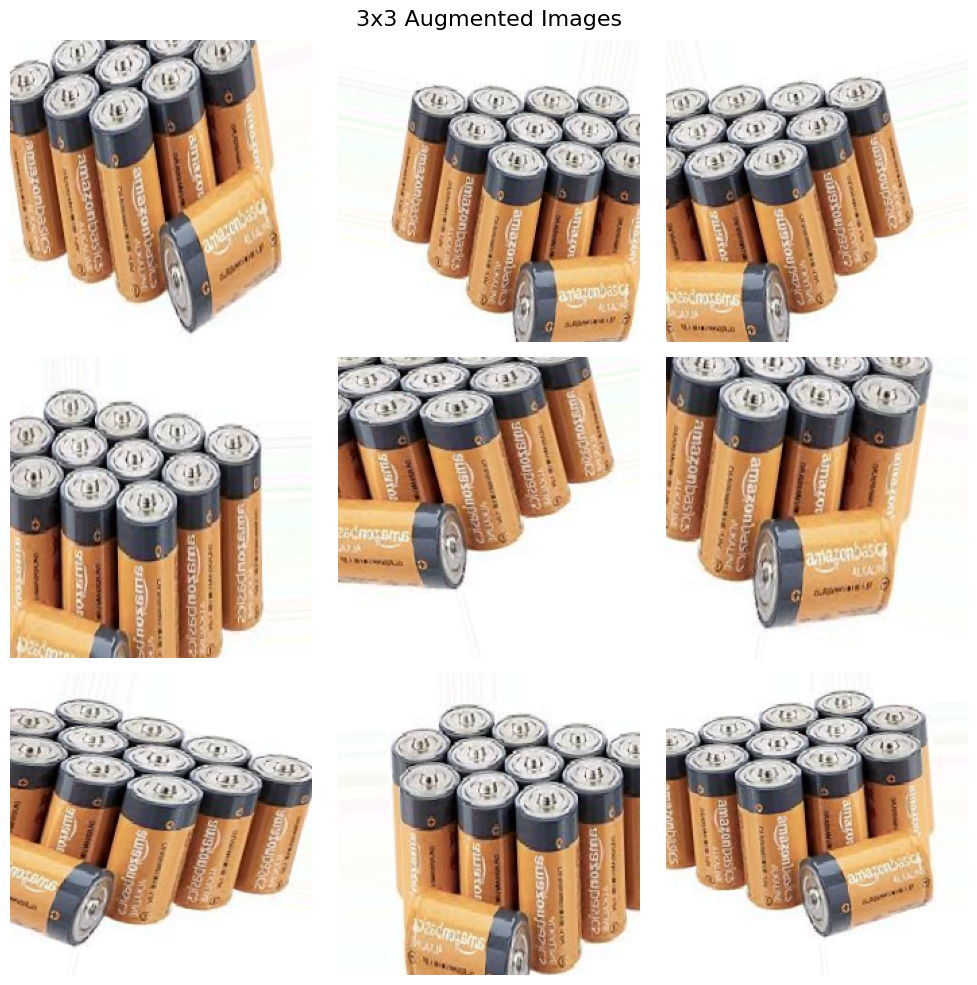

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array

# Path to the image (replace with your image path)
img_path = '/content/processed_garbage_classification/test/Hazardous/battery/battery104.jpg'

# Load the image
img = load_img(img_path, target_size=(224, 224))  # Resize image to 224x224
img_array = img_to_array(img)  # Convert image to numpy array
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

# Define data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,            # Rotate images by up to 20 degrees
    width_shift_range=0.2,        # Shift images horizontally by 20%
    height_shift_range=0.2,       # Shift images vertically by 20%
    shear_range=0.2,              # Apply shearing transformations
    zoom_range=0.2,               # Randomly zoom images by up to 20%
    horizontal_flip=True,         # Flip images horizontally
    fill_mode='nearest'           # Fill empty pixels after transformations
)

# Generate augmented images
aug_iter = datagen.flow(img_array, batch_size=1)  # Create iterator

# Create a 3x3 grid to visualize augmented images
plt.figure(figsize=(10, 10))  # Set grid size
for i in range(9):  # Generate 9 augmented images
    plt.subplot(3, 3, i + 1)  # Create 3x3 subplots
    batch = next(aug_iter)  # Get the next augmented image
    plt.imshow(batch[0].astype('uint8'))  # Display the image
    plt.axis('off')  # Hide axes
plt.suptitle("3x3 Augmented Images", fontsize=16)  # Add a title
plt.tight_layout()  # Adjust spacing
plt.show()  # Display the grid

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data Augmentation for Training Data
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    brightness_range=[0.8,1.2]  # Adjust brightness for more variability
)

# No Augmentation for Test Data (Only Rescaling)
test_datagen = ImageDataGenerator(
    rescale=1./255  # Normalize pixel values to [0,1]
)

# Train Generator
train_generator = train_datagen.flow_from_directory(
    '/content/processed_garbage_classification/train',  # Path to training directory
    target_size=(224, 224),           # Resize images to 224x224
    batch_size=32,                    # Batch size
    class_mode='categorical',         # Multi-class classification
    shuffle=True                      # Shuffle data for training
)

# Test Generator
test_generator = test_datagen.flow_from_directory(
    '/content/processed_garbage_classification/test',   # Path to test directory
    target_size=(224, 224),           # Resize images to 224x224
    batch_size=32,                    # Batch size
    class_mode='categorical',         # Multi-class classification
    shuffle=False                     # No shuffling for test data
)

# Print Class Indices
print("Class Indices:", train_generator.class_indices)

Found 12409 images belonging to 4 classes.
Found 3106 images belonging to 4 classes.
Class Indices: {'Hazardous': 0, 'Non-Recyclable': 1, 'Organic': 2, 'Recyclable': 3}


In [14]:
from tensorflow.keras import layers, models, Input
from tensorflow.keras.optimizers import Adam

# Input Layer
input_shape = (224, 224, 3)
model_input = Input(shape=input_shape)

# Shared CNN Layers
x = layers.Conv2D(32, (3, 3), activation='relu')(model_input)
x = layers.MaxPooling2D(2, 2)(x)

x = layers.Conv2D(64, (3, 3), activation='relu')(x)
x = layers.MaxPooling2D(2, 2)(x)

x = layers.Conv2D(128, (3, 3), activation='relu')(x)
x = layers.MaxPooling2D(2, 2)(x)

x = layers.Flatten()(x)

# Output 1: Top-Level Classification
top_level_output = layers.Dense(4, activation='softmax', name='top_level')(x)  # 4 classes

# Output 2: Sub-Category Classification
sub_category_output = layers.Dense(12, activation='softmax', name='sub_category')(x)  # Adjust to number of sub-categories

# Define the Model
model = models.Model(inputs=model_input, outputs=[top_level_output, sub_category_output])

# Compile the model
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss={
        'top_level': 'categorical_crossentropy',
        'sub_category': 'categorical_crossentropy'
    },
    metrics={
        'top_level': ['accuracy'],        # Metrics for top-level classification
        'sub_category': ['accuracy']      # Metrics for sub-category classification
    }
)


# Model Summary
model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 224, 224, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d (Conv2D)           │ (None, 222, 222, 32)   │            896 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d             │ (None, 111, 111, 32)   │              0 │ conv2d[0][0]           │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_1 (Conv2D)         │ (None, 109, 109, 64)   │         18,496 │ max_pooling2d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_1           │ (None, 54, 54, 64)     │              0 │ conv2d_1[0][0]         │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_2 (Conv2D)         │ (None, 52, 52, 128)    │         73,856 │ max_pooling2d_1[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_2           │ (None, 26, 26, 128)    │              0 │ conv2d_2[0][0]         │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten (Flatten)         │ (None, 86528)          │              0 │ max_pooling2d_2[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ top_level (Dense)         │ (None, 4)              │        346,116 │ flatten[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ sub_category (Dense)      │ (None, 12)             │      1,038,348 │ flatten[0][0]          │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 1,477,712 (5.64 MB)

 Trainable params: 1,477,712 (5.64 MB)

 Non-trainable params: 0 (0.00 B)

In [15]:
# Train the Model
history = model.fit(
    train_generator,
    epochs=10,  # Adjust as needed
    validation_data=test_generator
)


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/base_optimizer.py:678: UserWarning: Gradients do not exist for variables ['kernel', 'bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


388/388 ━━━━━━━━━━━━━━━━━━━━ 171s 417ms/step - loss: 1.0910 - top_level_accuracy: 0.5749 - val_loss: 0.8579 - val_top_level_accuracy: 0.6500
Epoch 2/10
388/388 ━━━━━━━━━━━━━━━━━━━━ 160s 406ms/step - loss: 0.8633 - top_level_accuracy: 0.6368 - val_loss: 0.8380 - val_top_level_accuracy: 0.6613
Epoch 3/10
388/388 ━━━━━━━━━━━━━━━━━━━━ 159s 403ms/step - loss: 0.8369 - top_level_accuracy: 0.6513 - val_loss: 0.8757 - val_top_level_accuracy: 0.6603
Epoch 4/10
388/388 ━━━━━━━━━━━━━━━━━━━━ 160s 405ms/step - loss: 0.8218 - top_level_accuracy: 0.6638 - val_loss: 0.8233 - val_top_level_accuracy: 0.6864
Epoch 5/10
388/388 ━━━━━━━━━━━━━━━━━━━━ 159s 403ms/step - loss: 0.8114 - top_level_accuracy: 0.6716 - val_loss: 0.7847 - val_top_level_accuracy: 0.6761
Epoch 6/10
388/388 ━━━━━━━━━━━━━━━━━━━━ 159s 403ms/step - loss: 0.7704 - top_level_accuracy: 0.6838 - val_loss: 0.7037 - val_top_level_accuracy: 0.7296
Epoch 7/10
388/388 ━━━━━━━━━━━━━━━━━━━━ 159s 402ms/step - loss: 0.7493 - top_level_accuracy: 0.7077

In [16]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import layers, models, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Input Layer
input_shape = (224, 224, 3)  # Image size for ResNet50 input
model_input = Input(shape=input_shape)

# Load the pre-trained ResNet50 model, excluding the top classification layer
base_model = ResNet50(input_shape=input_shape, include_top=False, weights='imagenet')



# Add custom layers on top of the base model
x = base_model(model_input)
x = layers.GlobalAveragePooling2D()(x)  # Global Average Pooling layer

# Add a fully connected layer for regularization (optional)
x = layers.Dense(512, activation='relu')(x)
x = layers.Dropout(0.5)(x)  # Dropout layer for regularization

# Output 1: Top-Level Classification (Main category)
top_level_output = layers.Dense(4, activation='softmax', name='top_level')(x)  # 4 classes: Hazardous, Non-Recyclable, Organic, Recyclable

# Output 2: Sub-Category Classification (Detailed class within each top-level category)
sub_category_output = layers.Dense(12, activation='softmax', name='sub_category')(x)  # Adjust to number of sub-categories

# Create the Model
model = models.Model(inputs=model_input, outputs=[top_level_output, sub_category_output])

# Compile the model with Adam optimizer and categorical crossentropy loss
model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss={
        'top_level': 'categorical_crossentropy',
        'sub_category': 'categorical_crossentropy'
    },
    metrics={
        'top_level': ['accuracy'],
        'sub_category': ['accuracy']
    }
)

# Model Summary
model.summary()

# === Step 1: Callbacks ===
early_stopping = EarlyStopping(
    monitor='val_loss',      # Monitor validation loss
    patience=5,              # Stop training after 5 epochs with no improvement
    restore_best_weights=True  # Restore the best model weights
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=3,
    min_lr=0.00001,
    verbose=1
)






94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ resnet50 (Functional)     │ (None, 7, 7, 2048)     │     23,587,712 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ global_average_pooling2d  │ (None, 2048)           │              0 │ resnet50[0][0]         │
│ (GlobalAveragePooling2D)  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense (Dense)             │ (None, 512)            │      1,049,088 │ global_average_poolin… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout (Dropout)         │ (None, 512)            │              0 │ dense[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ top_level (Dense)         │ (None, 4)              │          2,052 │ dropout[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ sub_category (Dense)      │ (None, 12)             │          6,156 │ dropout[0][0]          │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 24,645,008 (94.01 MB)

 Trainable params: 24,591,888 (93.81 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [17]:
history = model.fit(
    train_generator,
    epochs=20,
    validation_data=test_generator,
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

Epoch 1/20
388/388 ━━━━━━━━━━━━━━━━━━━━ 259s 508ms/step - loss: 0.4528 - top_level_accuracy: 0.8311 - val_loss: 2.9098 - val_top_level_accuracy: 0.2524 - learning_rate: 1.0000e-04
Epoch 2/20
388/388 ━━━━━━━━━━━━━━━━━━━━ 159s 404ms/step - loss: 0.1496 - top_level_accuracy: 0.9484 - val_loss: 0.5332 - val_top_level_accuracy: 0.8571 - learning_rate: 1.0000e-04
Epoch 3/20
388/388 ━━━━━━━━━━━━━━━━━━━━ 160s 405ms/step - loss: 0.1094 - top_level_accuracy: 0.9648 - val_loss: 0.1434 - val_top_level_accuracy: 0.9575 - learning_rate: 1.0000e-04
Epoch 4/20
388/388 ━━━━━━━━━━━━━━━━━━━━ 160s 405ms/step - loss: 0.1057 - top_level_accuracy: 0.9655 - val_loss: 0.3782 - val_top_level_accuracy: 0.9166 - learning_rate: 1.0000e-04
Epoch 5/20
388/388 ━━━━━━━━━━━━━━━━━━━━ 160s 404ms/step - loss: 0.0880 - top_level_accuracy: 0.9679 - val_loss: 0.1261 - val_top_level_accuracy: 0.9627 - learning_rate: 1.0000e-04
Epoch 6/20
388/388 ━━━━━━━━━━━━━━━━━━━━ 160s 406ms/step - loss: 0.0704 - top_level_accuracy: 0.9745 

In [18]:

# Get training and validation accuracy from the history object
train_accuracy = history.history['top_level_accuracy']
val_accuracy = history.history['val_top_level_accuracy']

# Print the training and validation accuracy as percentages
print(f"Training Accuracy: {train_accuracy[-1] * 100:.2f}%")
print(f"Validation Accuracy: {val_accuracy[-1] * 100:.2f}%")


Training Accuracy: 99.81%
Validation Accuracy: 98.62%


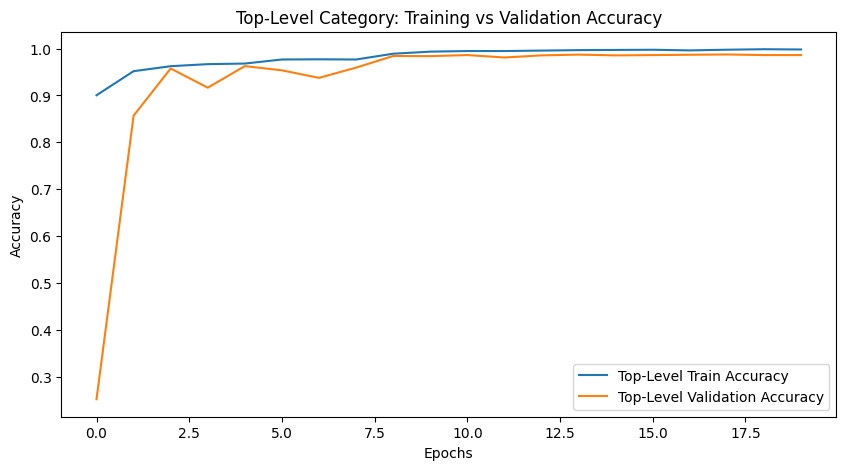

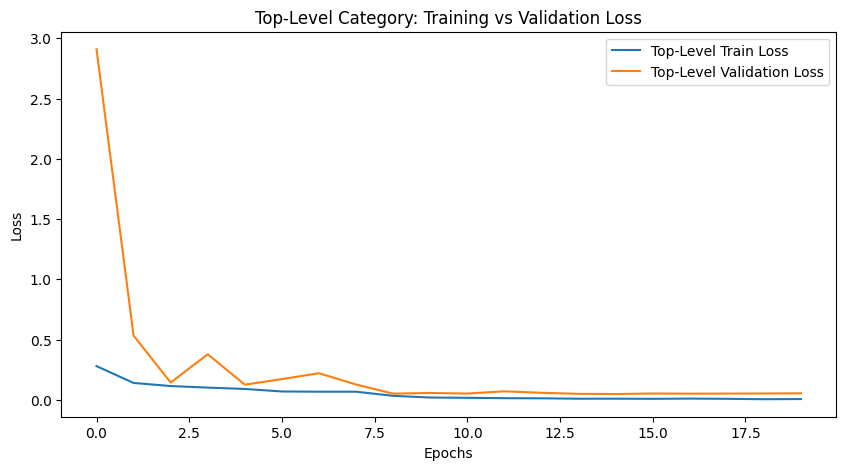

In [19]:
# Plot Accuracy
plt.figure(figsize=(10, 5))
plt.plot(history.history['top_level_accuracy'], label='Top-Level Train Accuracy')
plt.plot(history.history['val_top_level_accuracy'], label='Top-Level Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Top-Level Category: Training vs Validation Accuracy')
plt.show()

# Plot Loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Top-Level Train Loss')
plt.plot(history.history['val_loss'], label='Top-Level Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Top-Level Category: Training vs Validation Loss')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
Actual Class: Hazardous
Predicted class: Hazardous
Top-Level Confidence: 100.00%


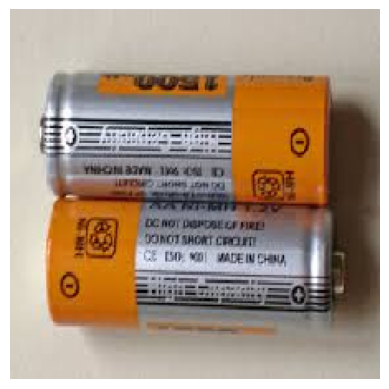

In [21]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Load the trained model (make sure to replace with the correct model path)
# model = tf.keras.models.load_model('your_model_path_here')

# Function to preprocess the image
def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))  # Resize image to the input size of the model
    img_array = image.img_to_array(img)  # Convert image to array
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array = img_array / 255.0  # Normalize the image
    return img_array

# Function to predict only top-level category
def predict_top_level(img_path, actual_class=None):
    img_array = preprocess_image(img_path)
    top_level_pred, _ = model.predict(img_array)

    top_level_category = np.argmax(top_level_pred, axis=1)[0]
    top_level_categories = ['Hazardous', 'Non-Recyclable', 'Organic', 'Recyclable']
    top_level_label = top_level_categories[top_level_category]

    top_level_confidence = max(top_level_pred[0]) * 100  # Confidence of top-level prediction

    # Print the comparison between actual class and predicted class if available
    if actual_class:
        print(f"Actual Class: {actual_class}")

    print(f"Predicted class: {top_level_label}")
    print(f"Top-Level Confidence: {top_level_confidence:.2f}%")

    return top_level_label, top_level_confidence  # Make sure to return the correct values

# Test with an image
img_path = '/content/processed_garbage_classification/test/Hazardous/battery/battery1.jpg'  # Replace with the path to your image
actual_class = 'Hazardous'  # Replace this with the actual class of the image (if known)

# Call the function correctly
top_level, top_level_confidence = predict_top_level(img_path, actual_class)

# Optionally, display the image
img = image.load_img(img_path, target_size=(224, 224))
plt.imshow(img)
plt.axis('off')
plt.show()


In [22]:
# Save the model as .h5 file
model.save("model.h5")
